# Classification Analysis - 2 - KNN Classification, Decision Tree Classification, Logistic Regression

## Import libraries and load dataset

In [218]:
# DataFrame Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA Imports
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# KNN Classifier Imports
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score

# DTC Imports
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

# Logistic Regression Imports
from sklearn.linear_model import LogisticRegression

In [219]:
# Load presaved dataset from seaborn

exe = sns.load_dataset("exercise")

In [220]:
exe

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


**Let's predict between the `kind` variable as `running and rest/walking`. So, I am altering values of walking to rest too.**

In [221]:
exe.loc[(exe['kind'] == "walking"), 'kind']= 'rest'

In [222]:
exe['kind'].unique()

['rest', 'running']
Categories (3, object): ['rest', 'walking', 'running']

## EDA

Dropping the first two columns as the first is index and second is `id`.

In [223]:
exe = exe[['diet', 'pulse', 'time', 'kind']]
exe.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


In [224]:
exe.shape

(90, 4)

In [225]:
exe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   diet    90 non-null     category
 1   pulse   90 non-null     int64   
 2   time    90 non-null     category
 3   kind    90 non-null     category
dtypes: category(3), int64(1)
memory usage: 1.5 KB


**Label encoding columns, `diet`, `kind`**

In [226]:
# instantiate the encoder
labelencoder = LabelEncoder()

# fit the encoder
exe.loc[:,'diet'] = labelencoder.fit_transform(exe['diet'])
exe.loc[:,'kind'] = labelencoder.fit_transform(exe['kind'])

# display 5 observations
exe.sample(5)

C:\Users\Vani\AppData\Local\Temp\ipykernel_20444\1188206768.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  exe.loc[:,'diet'] = labelencoder.fit_transform(exe['diet'])
C:\Users\Vani\AppData\Local\Temp\ipykernel_20444\1188206768.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  exe.loc[:,'kind'] 

,diet,pulse,time,kind
83,1,140,30 min,1
87,1,99,1 min,1
69,0,87,1 min,1
1,0,85,15 min,0
32,0,84,30 min,0


***I want to take absolute values of time to predict the activity, `kind`. So, let me strip off the `min` from the time column values and divide all values by 60 to make it in terms of hours and reduce randomness in the column.***

In [227]:
exe.loc[:,'time'] = exe['time'].str[:-4]
exe['time']

C:\Users\Vani\AppData\Local\Temp\ipykernel_20444\651995867.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1'
 '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1'
 '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1'
 '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1'
 '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1'
 '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30' '1' '15' '30']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  exe.loc[:,'time'] = exe['time'].str[:-4]


0      1
1     15
2     30
3      1
4     15
      ..
85    15
86    30
87     1
88    15
89    30
Name: time, Length: 90, dtype: object

In [228]:
exe.loc[:,'time'] = exe['time'].astype('int32')

In [229]:
exe.loc[:,'time'] = exe['time']/60

In [230]:
exe['time'].head()

0    0.016667
1        0.25
2         0.5
3    0.016667
4        0.25
Name: time, dtype: object

In [231]:
exe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   diet    90 non-null     int32 
 1   pulse   90 non-null     int64 
 2   time    90 non-null     object
 3   kind    90 non-null     int32 
dtypes: int32(2), int64(1), object(1)
memory usage: 2.2+ KB


## Data Visualizations

Let's `visualise` the data to understand it better.

### Plotting relation between pulse, diet and kind

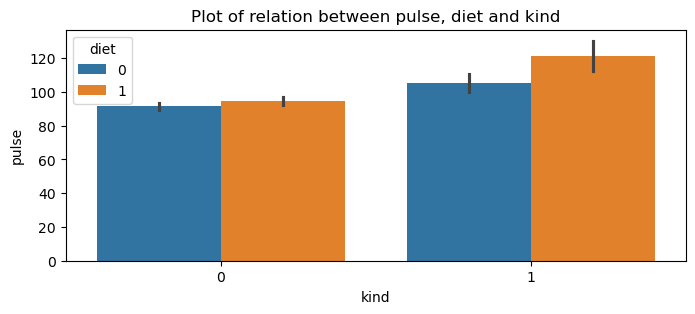

In [232]:
plt.figure(figsize=(8, 3))
sns.barplot(x='kind', y='pulse', hue = 'diet', data=exe)
plt.title('Plot of relation between pulse, diet and kind')
plt.show()

We can observe that `kind 1` has maximum `pulse` value.

## Missing Value Treatment

### Let's check for missing values

In [233]:
exe.isnull().values.any()

False

Let's plot a `heatmap` of missing values too to verify this.

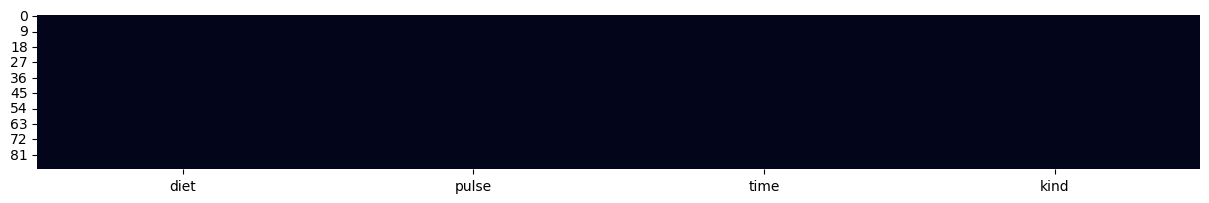

In [234]:
# set the figure size
plt.rcParams["figure.figsize"]=[15,2]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(exe.isnull(), cbar = False)

# display the plot
plt.show()

***We have ensured that there are no missing values in the dataset.***

## Outlier Treatment

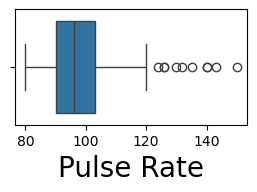

In [235]:
# let's first plot the outliers.
plt.figure(figsize=(3, 1.5))
z = sns.boxplot(x=exe['pulse'], whis=1.5)  # plot the boxplot
z.set_xlabel("Pulse Rate", fontsize=20)  # set the x-axis label
plt.show()

**Observing data, we can see that the outliers to pulse data are extreme and can be capped to upper bound value. So, let's cap them.**

In [236]:
Q1 = exe['pulse'].quantile(0.25)
Q3 = exe['pulse'].quantile(0.75)
print(Q3)
print(Q1)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)
print(lower_bound)

103.0
90.25
122.125
71.125


In [237]:
exe.loc[exe["pulse"] > 122, "pulse"] = 122

Let's plot the boxplot of the column again to verify that there are no outliers.

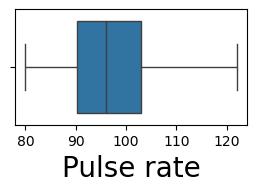

In [238]:
# let's first plot the outliers.
plt.figure(figsize=(3, 1.5))
z = sns.boxplot(x=exe['pulse'], whis=1.5)  # plot the boxplot
z.set_xlabel("Pulse rate", fontsize=20)  # set the x-axis label
plt.show()

## Scaling and Train-test Split

In [239]:
# select the target variable
Y = exe['kind']

# select all the independent variables
# by dropping the target variable
X = exe.drop(['kind'], axis = 1)

In [240]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.tail()

,0,1,2
85,1.0,1.000000,0.482759
86,1.0,1.000000,1.000000
87,1.0,0.452381,0.000000
88,1.0,0.738095,0.482759
89,1.0,1.000000,1.000000


## Train and Test Split

In [241]:
# let us now split the dataset into train & test
# test_size: the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state=197)

# print the shape of 'x_train'
print("X_train ",X_train.shape)

# print the shape of 'x_test'
print("X_test ",X_test.shape)

# print the shape of 'y_train'
print("Y_train ",y_train.shape)

# print the shape of 'y_test'
print("Y_test ",y_test.shape)

X_train  (63, 3)
X_test  (27, 3)
Y_train  (63,)
Y_test  (27,)


## KNN Classification

In [242]:
# Train the model with different K values and plot MAPE scores
k_values = np.arange(1,20,2)

Best k value: 11


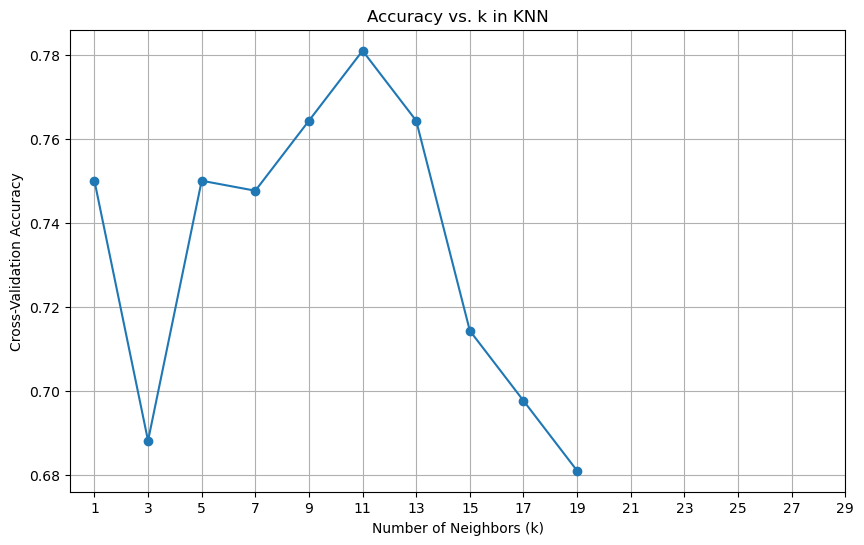

In [243]:
cv_scores = []          # List to hold cross-validation scores

# Find the best k value using cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')  # 10-fold cross-validation
    cv_scores.append(scores.mean())  # Mean accuracy for each k

# Determine the optimal k (the one with the highest accuracy)
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k value: {best_k}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Accuracy vs. k in KNN')
plt.xticks(np.arange(1, 31, step=2))
plt.grid(True)
plt.show()

**Let's take k = 9**

In [244]:
K = 9
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)  # Fit the model

# Set initial threshold
threshold = 0.5

# Predict probabilities for the training set
train_proba = model.predict_proba(X_train)[:, 1]
print(model.predict_proba(X_train)[0:20])

[[0.88888889 0.11111111]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.88888889 0.11111111]
 [0.88888889 0.11111111]
 [0.55555556 0.44444444]
 [0.66666667 0.33333333]
 [1.         0.        ]
 [0.55555556 0.44444444]
 [0.77777778 0.22222222]
 [0.77777778 0.22222222]
 [1.         0.        ]
 [0.55555556 0.44444444]
 [0.66666667 0.33333333]
 [0.55555556 0.44444444]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.66666667 0.33333333]
 [0.77777778 0.22222222]
 [1.         0.        ]]


Train proba: [0.11111111 0.33333333 0.33333333 0.11111111 0.11111111 0.44444444
 0.33333333 0.         0.44444444 0.22222222 0.22222222 0.
 0.44444444 0.33333333 0.44444444 0.33333333 0.33333333 0.33333333
 0.22222222 0.         0.22222222 0.22222222 0.44444444 0.
 0.33333333 0.22222222 0.22222222 0.44444444 0.77777778 0.55555556
 0.22222222 0.33333333 0.33333333 0.22222222 0.44444444 0.77777778
 0.22222222 0.         0.33333333 0.33333333 0.33333333 0.77777778
 0.         0.44444444 0.22222222 0.11111111 0.22222222 0.44444444
 0.         0.44444444 0.33333333 0.33333333 0.44444444 0.77777778
 0.77777778 0.22222222 0.77777778 0.22222222 0.44444444 0.33333333
 0.77777778 0.22222222 0.        ]
Confusion Matrix:
 [[18  0]
 [ 5  4]]


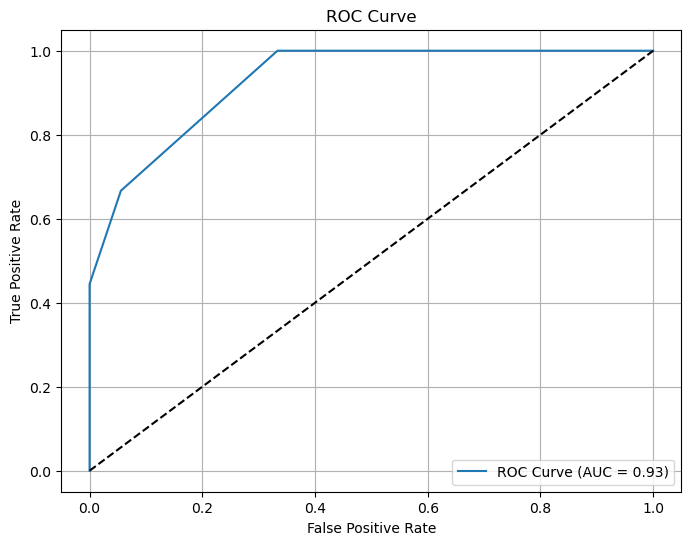

Best Threshold: 0.3333333333333333
Confusion Matrix with Best Threshold:
 [[12  6]
 [ 0  9]]


In [245]:
print("Train proba:", train_proba)

# Predict classes based on the threshold for training set
y_train_pred = (train_proba >= threshold).astype(int)

# Similarly, predict probabilities for the test set
test_proba = model.predict_proba(X_test)[:, 1]

# Predict classes based on the threshold for test set
y_test_pred = (test_proba >= threshold).astype(int)

# Confusion matrix for test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Initialize lists to store TPR, FPR, and thresholds
fprs, tprs, thresholds = roc_curve(y_test, test_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(fprs, tprs)))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
best_threshold_index = np.argmax(tprs - fprs)
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)

# Predict using the best threshold
y_test_best_pred = (test_proba >= best_threshold).astype(int)
best_conf_matrix = confusion_matrix(y_test, y_test_best_pred)

print("Confusion Matrix with Best Threshold:\n", best_conf_matrix)

**Inference:** We can observe that AUC = 0.93, so, this model is good.

## Decision Tree Classification

In [246]:
clf = DecisionTreeClassifier(criterion='gini', random_state=0)

In [247]:
dtc = clf.fit(X_scaled,Y)

In [250]:
# feature importance
pd.DataFrame({'features':['diet', 'pulse', 'time'], 'importance':dtc.feature_importances_})

,features,importance
0,diet,0.105646
1,pulse,0.777058
2,time,0.117296


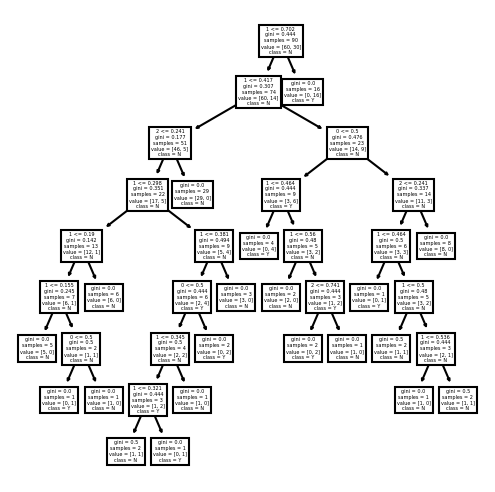

In [252]:
plt.figure(figsize=(4,4), dpi=150)
plot_tree(dtc, feature_names=X_scaled.columns, class_names=['N','Y']);

In [253]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
model = clf.fit(X_scaled,Y)

In [254]:
threshold = 0.99
yhat = []
for i in model.predict_proba(X_scaled)[:,1]:
    if i > threshold:
        yhat.append(1)
    else:
        yhat.append(0)
print(yhat)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


**Inference:** We have obtained the significance of each of the features in predicting the label value and we have obtained the predicted values for the test values using Gini reduction method.

## Logistic Regression

In [272]:
lr = LogisticRegression()
lr.fit(X_scaled, Y)

LogisticRegression()

In [275]:
# Predict probabilities and add to dataframe
exe.loc[:,'prob'] = model.predict_proba(X_scaled)[:, 1]
exe['prob']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
85    1.0
86    1.0
87    1.0
88    1.0
89    1.0
Name: prob, Length: 90, dtype: float64

In [276]:
# Initialize empty dataframe to store metrics
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

In [277]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (gsr['prob'] > threshold).astype(int)
    cm = confusion_matrix(Y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR, 'auc_score':roc_auc_score(Y,y_pred)})

In [278]:
# Compute AUC
auc = roc_auc_score(Y, gsr['prob'])

In [279]:
# Print ROC curve and AUC
print(df_ROC)
print('AUC:', auc)

    Threshold    TP    TN   FP    FN  TPR   FPR
0         0.0  30.0  57.0  3.0   0.0  1.0  0.05
1         0.1  30.0  57.0  3.0   0.0  1.0  0.05
2         0.2  30.0  57.0  3.0   0.0  1.0  0.05
3         0.3  30.0  57.0  3.0   0.0  1.0  0.05
4         0.4  30.0  57.0  3.0   0.0  1.0  0.05
5         0.5  27.0  60.0  0.0   3.0  0.9  0.00
6         0.6  27.0  60.0  0.0   3.0  0.9  0.00
7         0.7  27.0  60.0  0.0   3.0  0.9  0.00
8         0.8  27.0  60.0  0.0   3.0  0.9  0.00
9         0.9  27.0  60.0  0.0   3.0  0.9  0.00
10        1.0   0.0  60.0  0.0  30.0  0.0  0.00
AUC: 0.9974999999999999


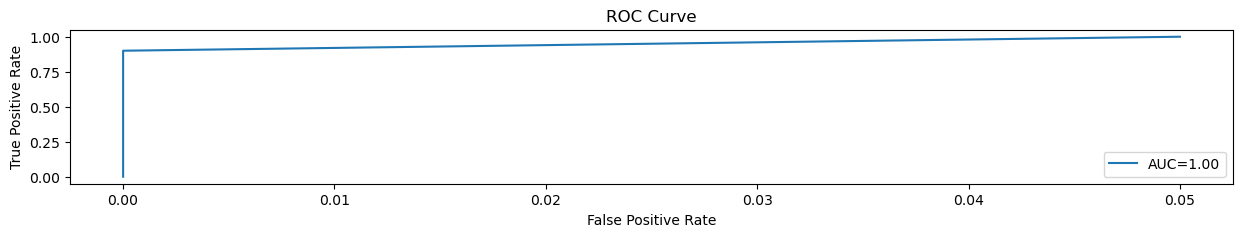

In [280]:
# Plot ROC curve from df_ROC
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()